In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

1 задание

In [ ]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2 задание

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


3 задание

In [ ]:
numerical_data = df[['satisfaction_level', 'last_evaluation', 'number_project',
                        'average_montly_hours', 'time_spend_company',
                        'Work_accident', 'promotion_last_5years']]


In [ ]:
correlation_matrix = numerical_data.corr()

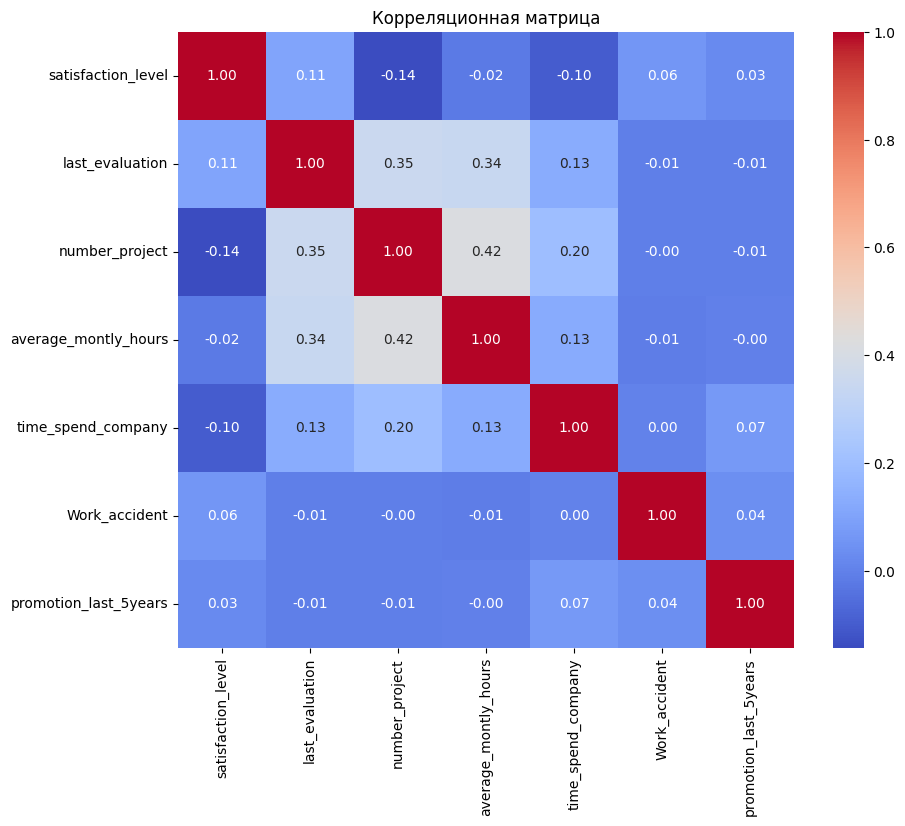

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
abs_corr = correlation_matrix.abs()

for i in range(len(abs_corr)):
    abs_corr.iloc[i, i] = 0

most_correlated = abs_corr.stack().nlargest(2)

least_correlated = abs_corr.stack().nsmallest(2)

print("Наиболее скоррелированные переменные:\n", most_correlated)
print("\nНаименее скоррелированные переменные:\n", least_correlated)


Наиболее скоррелированные переменные:
 number_project        average_montly_hours    0.417211
average_montly_hours  number_project          0.417211
dtype: float64

Наименее скоррелированные переменные:
 satisfaction_level  satisfaction_level    0.0
last_evaluation     last_evaluation       0.0
dtype: float64


Наибольшая положительная корреляция наблюдается между количеством проектов и средним количеством отработанных часов.


4 задание

In [ ]:
department_counts = df['department'].value_counts()

print(department_counts)

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


Больше всего сотрудников работает в отделе продаж, что может быть связано с особенностями бизнеса компании. Остальные отделы имеют меньше сотрудников, что также логично в зависимости от их функционала.

5 задание

In [ ]:
salary_counts = df['salary'].value_counts()
print(salary_counts)


salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


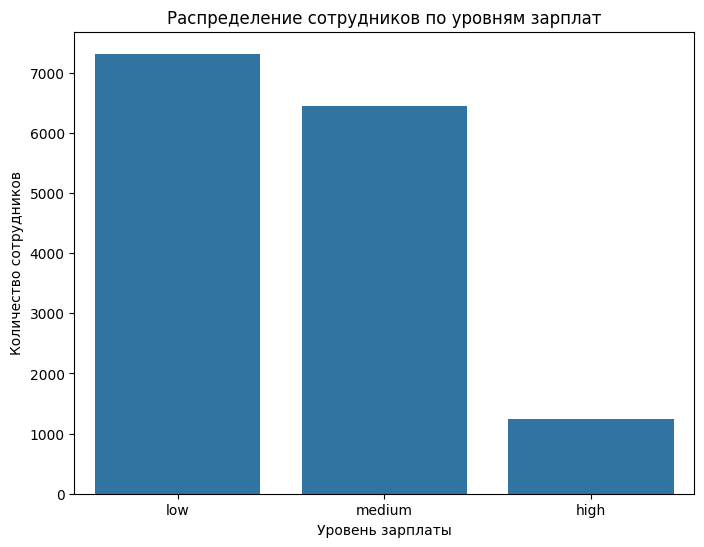

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='salary', order=salary_counts.index)
plt.title('Распределение сотрудников по уровням зарплат')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()


Наиболее популярный уровень зарплаты — низкий, что может указывать на экономию компании на затратах труда или на распределение зарплат в соответствии с функциями сотрудников.

6 задание

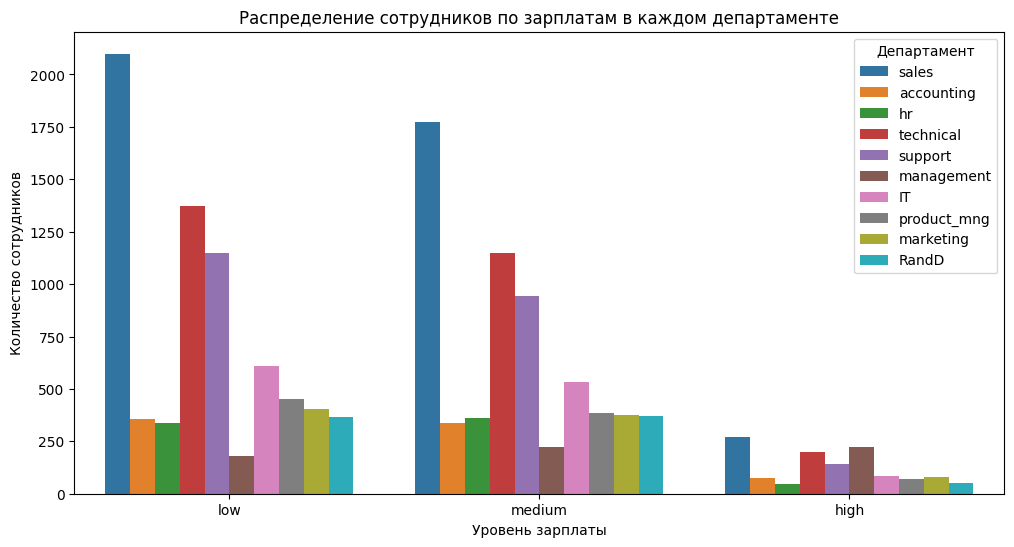

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='salary', hue='department', order=df['salary'].value_counts().index)
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.legend(title='Департамент')
plt.show()


Анализ показывает, что в департаментах R&D и IT чаще встречаются высокие зарплаты, в то время как в отделе HR доминируют низкие зарплаты. Это отражает различия в уровне квалификации и ответственности сотрудников.

7 задание

In [ ]:
df['salary'] = df['salary'].astype('category')

average_hours = df.groupby('salary')['average_montly_hours'].mean()
print(average_hours)


salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64


<ipython-input-13-d82f9faf9535>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_hours = df.groupby('salary')['average_montly_hours'].mean()


Сотрудники с высоким уровнем зарплаты работают в среднем 199.87 часов в месяц.
Сотрудники с низким уровнем зарплаты — 200.99 часов.
Разница в среднем времени минимальна.

In [ ]:
from scipy.stats import ttest_ind

high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

t_stat, p_value = ttest_ind(high_salary, low_salary)

print(f"T-статистика: {t_stat}, P-значение: {p_value}")


T-статистика: -0.7288680398062308, P-значение: 0.4661023478267259


T-тест:

T-статистика равна -0.73, а p-значение — 0.466.
P-значение больше стандартного уровня значимости (0.05), что говорит о неотвержении нулевой гипотезы.
Поэтому нет статистически значимой разницы во времени, проводимом на работе, между сотрудниками с высоким и низким уровнем зарплаты.


Разница в среднем времени работы между группами минимальна, что уже говорит о слабой связи между зарплатой и временем.
Вполне возможно, что время работы определяется другими факторами, такими как должностные обязанности или политика компании, а не уровнем зарплаты.

8 задание

In [ ]:
left_employees = df[df['left'] == 1]
stayed_employees = df[df['left'] == 0]

for group, label in zip([left_employees, stayed_employees], ['Уволившиеся', 'Оставшиеся']):
    print(f"\n{label} сотрудники:")
    print(f"Доля с повышением за последние 5 лет: {group['promotion_last_5years'].mean():.2%}")
    print(f"Средняя степень удовлетворенности: {group['satisfaction_level'].mean():.2f}")
    print(f"Среднее количество проектов: {group['number_project'].mean():.2f}")




Уволившиеся сотрудники:
Доля с повышением за последние 5 лет: 0.53%
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.86

Оставшиеся сотрудники:
Доля с повышением за последние 5 лет: 2.63%
Средняя степень удовлетворенности: 0.67
Среднее количество проектов: 3.79


Выводы:

       - Сотрудники, получившие повышение, реже увольняются
       - Низкий уровень удовлетворенности связан с повышенной текучестью кадров
       - Среднее количество проектов у уволившихся немного выше, что может быть связано с перегрузкой сотрудников

9 задание

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['left', 'department', 'salary'])
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (10499, 7)
Размер тестовой выборки: (4500, 7)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

print("Отчет классификации:")
print(classification_report(y_test, y_pred))


Отчет классификации:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3428
           1       0.48      0.25      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



Модель LDA показывает такие результаты:

Точность предсказания для оставшихся сотрудников (class 0): 92%. Модель успешно классифицирует сотрудников, которые остаются в компании.
Точность для уволившихся сотрудников (class 1): 25%. Это низкий показатель, указывающий на сложности модели в прогнозировании увольнений.
Общая точность модели: 76%. Принимая во внимание дисбаланс классов (в компании больше остающихся сотрудников), модель имеет приемлемую общую точность, но плохо предсказывает увольнения.